# Importing all the necessary files and modules. 

Our first step to CNN model starts with the listing of all the important modules.
1) cv2: Used for importing images and converting it into numpy array
2) Matplotlib: Since in Jupyter notebook we cannot use cv2.imshow() as it creates a small issue. Hence using imshow() in matplotlib.pyplot
    for displaying the image
3) tensorflow: to call the backend or suppoting Keras API.
4) Dense, Dropout, Activation,Flatten: Creating the network used for desigining the CNN architecture
5) OS: To locate files after downloading the file, from local machine
6) tqdm: To give a professional loading info and look when the images are being loaded from local machine
7) numpy: For reshaping and creating arrays for numerical calculation

In [2]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from tqdm import tqdm
import numpy as np

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

# Next Step: Defining the path where the dataset is stored in local Machine

In [3]:
path="D://datasets//IIIT_D//train";#path where the dataset is downloaded in my machine
fol=os.listdir(path)#list of files in the 'train' folder in the location D:\datasets\IIIT_D\train

# Start of Preprocessing

Next steps include a) create a bag of symbols so that we can assign a unique number to each symbol as below
b) Also define a one_hot() which will create a one hot vector. Although for now it creates a list of zeros to conquer the dimensionality
issue faced during the training. But will be later converted into a numpy array.
So the vector is of size 62(62 unique characters in the dataset.)

In [4]:
X,y=list(),list();#define empty list for acquiring training and testing data
size=len(fol);
#next create a bag of symbols which will be a dictionary
bag={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',
    18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',
    35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',46:'k',47:'l',48:'m',
     49:'n',50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',61:'z'};
#define our one_hot vector
def one_hot(val,size):
    a=np.array([0]*size);
    a[val]=1;
    return a;

# Next Step: Accessing the dataset from the local machine in X and y lists.

So first we create a list of all the files in the 'path' mentioned above. Also keep a track of the position of each file using a 
counter in form of the variable 'val'. Then the folders under the 'path' mentioned above are explored one by one which contains the pictures.
Here only one thing to be noted which can change the full results is the order of the files must comply with the bag of symbols
i.e. the first file namely Sample001 in the given dataset which is actually pictures of '0' written in handwritten must comply 
with the first symbol in our bag of symbol which is '0'.

In [5]:
for val,i in tqdm(enumerate(fol)):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255#normalize by dividing by 255 for better results.
        X.append((np.reshape(cv2.resize(img,(50,50)),(50,50,1))))#initially we obtained a 2d array. In order to fit it in our keras CNN model, we had to convert it into a 3d model. Also the image is downsized to avoid OOM (Out of Memory) exception
        y.append(one_hot(val,size))#store our results by converting it into a one-hot vector. Here the enumerate () returning counter val palys a very important role.

62it [01:57,  1.77s/it]


# Splitting the dataset

The data is splitted into training and cross validation sets. Cross validation size 15% of total data. It aids our results and gives a genuine boost
in our accuracy

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15, random_state=42)
X_train_arr=np.array(X_train)
X_val_arr=np.array(X_val)
y_train_arr=np.array(y_train)
y_val_arr=np.array(y_val)
_,h,w,d=X_train_arr.shape

# Create CNN model the feed forward network

All set and done with the processing. Lets now create a training CNN network. After lots of optimization I have narrowed it down 
to the below network. It is a sequential model Cosisting of 2 Convolution layer following which we have a MaxPooling layer to 
pull out the maximum value of each 2x2 kernel and use pass it to the next layer. To avoid plagiarism I have used my surname as the variable.
Although some keywords were manditory to use and could not help there. Ok as we can in the summary below, it gives us a rough idea of the feed forward network.
Trainable parameters mean the weights and bias values that are initially assumed to be random values and are to be optimized later during the subsequent epochs.
The Keras model has taken care of the backpropagation training process for us.

In [7]:
ganguly = Sequential()
ganguly.add(Conv2D(248, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Conv2D(62, kernel_size=3, activation='relu',border_mode='same'))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(62, activation='softmax'))
ganguly.summary()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(248, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(62, kernel_size=3, activation="relu", padding="same")`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 248)       6448      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 248)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 62)        138446    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 62)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8928)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                553598    
Total params: 698,492
Trainable params: 698,492
Non-trainable params: 0
_________________________________________________________________


# Training and compiling the network

So our next step is just use the above network to train our value. Now to measure the loss we use cross_entropy and optimze it with Adam's optimization.
Finally feed the value with traing data and expected results of the data and cross validating against X_val_arr and y_val_arr

In [8]:
ganguly.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
print(feeds.history)

Train on 2108 samples, validate on 372 samples
Epoch 1/10
2108/2108 [==============================] - ETA: 26:38 - loss: 4.1033 - acc: 0.0000e+ - ETA: 13:08 - loss: 4.1542 - acc: 0.0000e+ - ETA: 8:38 - loss: 4.1675 - acc: 0.0104     - ETA: 5:02 - loss: 4.1352 - acc: 0.018 - ETA: 4:08 - loss: 4.1451 - acc: 0.015 - ETA: 3:29 - loss: 4.1403 - acc: 0.013 - ETA: 3:00 - loss: 4.1404 - acc: 0.011 - ETA: 2:38 - loss: 4.1316 - acc: 0.020 - ETA: 2:20 - loss: 4.1291 - acc: 0.018 - ETA: 2:05 - loss: 4.1276 - acc: 0.017 - ETA: 1:53 - loss: 4.1261 - acc: 0.015 - ETA: 1:42 - loss: 4.1231 - acc: 0.016 - ETA: 1:34 - loss: 4.1239 - acc: 0.015 - ETA: 1:26 - loss: 4.1277 - acc: 0.014 - ETA: 1:19 - loss: 4.1292 - acc: 0.015 - ETA: 1:13 - loss: 4.1298 - acc: 0.014 - ETA: 1:08 - loss: 4.1282 - acc: 0.015 - ETA: 1:03 - loss: 4.1288 - acc: 0.016 - ETA: 59s - loss: 4.1284 - acc: 0.015 - ETA: 55s - loss: 4.1268 - acc: 0.01 - ETA: 51s - loss: 4.1260 - acc: 0.01 - ETA: 48s - loss: 4.1257 - acc: 0.01 - ETA: 45s - 

2108/2108 [==============================] - ETA: 5s - loss: 0.7518 - acc: 0.843 - ETA: 3s - loss: 0.9677 - acc: 0.729 - ETA: 3s - loss: 0.9458 - acc: 0.742 - ETA: 3s - loss: 0.9563 - acc: 0.737 - ETA: 3s - loss: 1.0003 - acc: 0.729 - ETA: 3s - loss: 0.9707 - acc: 0.745 - ETA: 3s - loss: 0.9561 - acc: 0.742 - ETA: 3s - loss: 0.9800 - acc: 0.739 - ETA: 3s - loss: 0.9869 - acc: 0.740 - ETA: 3s - loss: 0.9868 - acc: 0.738 - ETA: 3s - loss: 1.0019 - acc: 0.731 - ETA: 2s - loss: 0.9825 - acc: 0.733 - ETA: 2s - loss: 0.9592 - acc: 0.741 - ETA: 2s - loss: 0.9761 - acc: 0.737 - ETA: 2s - loss: 0.9722 - acc: 0.740 - ETA: 2s - loss: 0.9809 - acc: 0.737 - ETA: 2s - loss: 0.9680 - acc: 0.739 - ETA: 2s - loss: 0.9947 - acc: 0.732 - ETA: 2s - loss: 0.9757 - acc: 0.735 - ETA: 2s - loss: 0.9850 - acc: 0.737 - ETA: 2s - loss: 0.9983 - acc: 0.737 - ETA: 2s - loss: 1.0044 - acc: 0.735 - ETA: 2s - loss: 1.0005 - acc: 0.738 - ETA: 2s - loss: 0.9971 - acc: 0.741 - ETA: 2s - loss: 1.0005 - acc: 0.737 - ETA: 

2108/2108 [==============================] - ETA: 2s - loss: 0.2509 - acc: 0.968 - ETA: 3s - loss: 0.2089 - acc: 0.984 - ETA: 3s - loss: 0.1942 - acc: 0.989 - ETA: 2s - loss: 0.2080 - acc: 0.981 - ETA: 2s - loss: 0.2763 - acc: 0.955 - ETA: 2s - loss: 0.2941 - acc: 0.937 - ETA: 2s - loss: 0.3305 - acc: 0.926 - ETA: 2s - loss: 0.3360 - acc: 0.919 - ETA: 2s - loss: 0.3650 - acc: 0.911 - ETA: 2s - loss: 0.3597 - acc: 0.910 - ETA: 2s - loss: 0.3685 - acc: 0.906 - ETA: 2s - loss: 0.3641 - acc: 0.906 - ETA: 2s - loss: 0.3773 - acc: 0.902 - ETA: 2s - loss: 0.3644 - acc: 0.906 - ETA: 2s - loss: 0.3507 - acc: 0.910 - ETA: 2s - loss: 0.3516 - acc: 0.907 - ETA: 2s - loss: 0.3555 - acc: 0.904 - ETA: 2s - loss: 0.3534 - acc: 0.906 - ETA: 2s - loss: 0.3567 - acc: 0.906 - ETA: 1s - loss: 0.3556 - acc: 0.905 - ETA: 2s - loss: 0.3517 - acc: 0.906 - ETA: 2s - loss: 0.3522 - acc: 0.905 - ETA: 2s - loss: 0.3545 - acc: 0.904 - ETA: 2s - loss: 0.3486 - acc: 0.906 - ETA: 2s - loss: 0.3504 - acc: 0.904 - ETA: 

2108/2108 [==============================] - ETA: 2s - loss: 0.3701 - acc: 0.906 - ETA: 3s - loss: 0.2408 - acc: 0.921 - ETA: 3s - loss: 0.1995 - acc: 0.937 - ETA: 3s - loss: 0.1798 - acc: 0.945 - ETA: 3s - loss: 0.1621 - acc: 0.950 - ETA: 3s - loss: 0.1671 - acc: 0.947 - ETA: 2s - loss: 0.1573 - acc: 0.950 - ETA: 2s - loss: 0.1611 - acc: 0.949 - ETA: 2s - loss: 0.1700 - acc: 0.950 - ETA: 2s - loss: 0.1614 - acc: 0.951 - ETA: 2s - loss: 0.1570 - acc: 0.954 - ETA: 2s - loss: 0.1697 - acc: 0.952 - ETA: 2s - loss: 0.1705 - acc: 0.951 - ETA: 2s - loss: 0.1645 - acc: 0.954 - ETA: 2s - loss: 0.1637 - acc: 0.954 - ETA: 2s - loss: 0.1639 - acc: 0.953 - ETA: 2s - loss: 0.1574 - acc: 0.956 - ETA: 2s - loss: 0.1519 - acc: 0.958 - ETA: 2s - loss: 0.1554 - acc: 0.953 - ETA: 2s - loss: 0.1520 - acc: 0.955 - ETA: 1s - loss: 0.1529 - acc: 0.954 - ETA: 1s - loss: 0.1541 - acc: 0.954 - ETA: 1s - loss: 0.1510 - acc: 0.955 - ETA: 1s - loss: 0.1523 - acc: 0.956 - ETA: 1s - loss: 0.1493 - acc: 0.957 - ETA: 

In [9]:
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Final accuracy on the training data is: 0.95825426911041
Cross_Validating accuracy is: 0.5940860208644662


# Testing with some image

After we have seen the training accuracy and validation accuracy, we are confident enough to test our output. So I am using an image from our 
given dataset to check whether it is identified correct. Now since we have trained the model to return a vector. Hence here also the prediction will actually be a vector.
We need to find the maximum probability lies on which position. The index of that position is the predicted result. And we can obtain the symbol using the bag of symbol and this index.

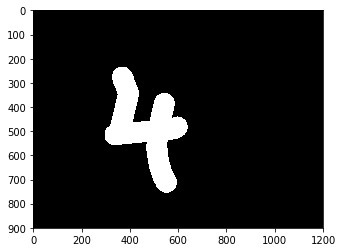

In [10]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample005//img005-001.png",cv2.IMREAD_GRAYSCALE)/255
img1=np.reshape((cv2.resize(img,(50,50))),(50,50,1))
plt.imshow(img,cmap=plt.cm.binary)

In [12]:
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(bag[val],"with accuracy of",acc)

4 with accuracy of 0.99976295


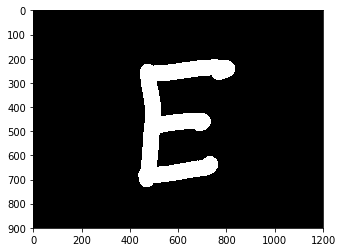

In [16]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample015//img015-028.png",cv2.IMREAD_GRAYSCALE)/255
img1=np.reshape((cv2.resize(img,(50,50))),(50,50,1))
plt.imshow(img,cmap=plt.cm.binary)

In [17]:
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(bag[val],"with accuracy of",acc)

E with accuracy of 0.9995685


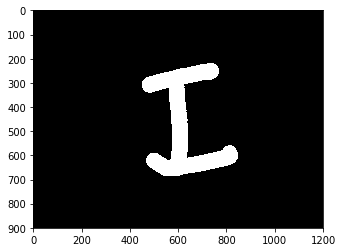

In [18]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample019//img019-028.png",cv2.IMREAD_GRAYSCALE)/255
img1=np.reshape((cv2.resize(img,(50,50))),(50,50,1))
plt.imshow(img,cmap=plt.cm.binary)

In [19]:
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(bag[val],"with accuracy of",acc)

I with accuracy of 0.99707603


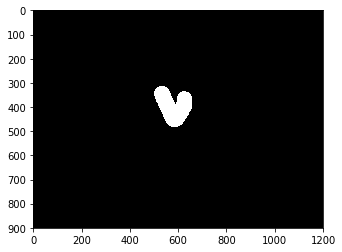

In [20]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample058//img058-008.png",cv2.IMREAD_GRAYSCALE)/255
img1=np.reshape((cv2.resize(img,(50,50))),(50,50,1))
plt.imshow(img,cmap=plt.cm.binary)

In [21]:
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(bag[val],"with accuracy of",acc)

v with accuracy of 0.7134731
